# 1. Face recognition using manual features

<img src="https://raw.githubusercontent.com/cmusatyalab/openface/master/images/summary.jpg" width="500"/>

# Face Normalization -> Detect, Transform, Crop

In [19]:
# https://opencv.org/
import cv2
import pandas as pd
import glob

In [14]:
path = "faces-datamad0620/todas_heterogeneas"
homogeneas = [
    *glob.glob(f"{path}/**/*.jpg"),
    *glob.glob(f"{path}/**/*.JPG")
]

In [15]:
df = pd.DataFrame({
    "path":homogeneas
})
df.head()

,path
0,faces-datamad0620/todas_heterogeneas/carlos/8.jpg
1,faces-datamad0620/todas_heterogeneas/carlos/9.jpg
2,faces-datamad0620/todas_heterogeneas/carlos/10...
3,faces-datamad0620/todas_heterogeneas/carlos/4.jpg
4,faces-datamad0620/todas_heterogeneas/carlos/5.jpg


In [16]:
df["GT"] = df.path.apply(lambda x: x.split("/")[2])
df.head()

,path,GT
0,faces-datamad0620/todas_heterogeneas/carlos/8.jpg,carlos
1,faces-datamad0620/todas_heterogeneas/carlos/9.jpg,carlos
2,faces-datamad0620/todas_heterogeneas/carlos/10...,carlos
3,faces-datamad0620/todas_heterogeneas/carlos/4.jpg,carlos
4,faces-datamad0620/todas_heterogeneas/carlos/5.jpg,carlos


In [18]:
df.GT.value_counts()

jose       10
carlos     10
adri       10
germán    10
míriam    10
jaime      10
nicola     10
antonio    10
paula      10
Name: GT, dtype: int64

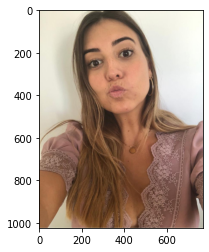

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread("faces-datamad0620/todas_homogeneas/míriam/8.jpg") 
# Reorganize numpy array for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [29]:
# https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

# Face classifier model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



(1024, 769)


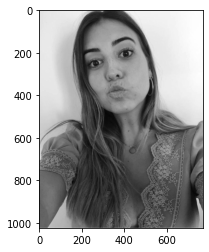

In [30]:

img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img_bw.shape)
plt.imshow(img_bw, cmap="gray")

[[142  71 413 413]
 [381 488 108 108]]


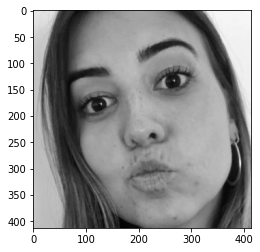

In [31]:
faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
print(faces)
x,y,w,h = faces[0]
plt.imshow(img_bw[y:y+h,x:x+w],cmap="gray")

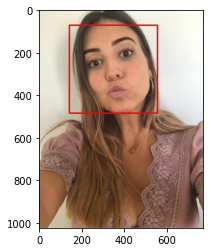

In [32]:
im_col = cv2.rectangle(img, (x,y), (x+w,y+h),(255, 0, 0) ,5)
plt.imshow(im_col)
  

In [33]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        x,y,w,h = faces[0]
        return img_bw[y:y+h,x:x+w]
    else:
        raise ValueError("No face found")

        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path) 
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

    

In [34]:
df["face"] = df.path.apply(lambda path: openImageAndDetectFaces(path))

Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/8.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/9.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/10.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/4.jpg
Not found image in faces-datamad0620/todas_heterogeneas/carlos/4.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/5.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/7.jpg
Not found image in faces-datamad0620/todas_heterogeneas/carlos/7.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/6.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/2.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/3.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/carlos/1.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/nicola/8.jpg
Detecting faces in faces-datamad0620/todas_heterogeneas/nicola/9.jpg
Detecting faces in faces-datamad0

In [35]:
df.head()

,path,GT,face
0,faces-datamad0620/todas_heterogeneas/carlos/8.jpg,carlos,"[[199, 195, 191, 157, 124, 105, 129, 118, 130,..."
1,faces-datamad0620/todas_heterogeneas/carlos/9.jpg,carlos,"[[38, 34, 41, 40, 41, 39, 39, 42, 42, 42, 43, ..."
2,faces-datamad0620/todas_heterogeneas/carlos/10...,carlos,"[[62, 59, 63, 65, 66, 70, 73, 77, 82, 79, 84, ..."
3,faces-datamad0620/todas_heterogeneas/carlos/4.jpg,carlos,None
4,faces-datamad0620/todas_heterogeneas/carlos/5.jpg,carlos,"[[30, 12, 11, 10, 11, 7, 6, 8, 7, 9, 29, 84, 9..."


In [43]:
df = df[~df["face"].isna()]
df["shapes"] = df.face.apply(lambda face: face.shape)

In [44]:
df.head()

,path,GT,face,shapes
0,faces-datamad0620/todas_heterogeneas/carlos/8.jpg,carlos,"[[199, 195, 191, 157, 124, 105, 129, 118, 130,...","(39, 39)"
1,faces-datamad0620/todas_heterogeneas/carlos/9.jpg,carlos,"[[38, 34, 41, 40, 41, 39, 39, 42, 42, 42, 43, ...","(63, 63)"
2,faces-datamad0620/todas_heterogeneas/carlos/10...,carlos,"[[62, 59, 63, 65, 66, 70, 73, 77, 82, 79, 84, ...","(207, 207)"
4,faces-datamad0620/todas_heterogeneas/carlos/5.jpg,carlos,"[[30, 12, 11, 10, 11, 7, 6, 8, 7, 9, 29, 84, 9...","(98, 98)"
6,faces-datamad0620/todas_heterogeneas/carlos/6.jpg,carlos,"[[42, 43, 72, 68, 86, 60, 43, 45, 77, 82, 44, ...","(52, 52)"


[[11.76051184 10.90086488  8.72967564  9.147403    9.57723686  9.28694332
   7.98785738  8.66830781  6.29050786  7.25985597  8.0687715   7.55906944
   7.65920289  7.03917159  7.72645099  6.56316227  7.6956228   7.1913978
   7.38478827]
 [ 7.42709528  8.95480323  8.64272787  9.10868035  8.69491455  8.04735854
   8.98832749  8.37360297  7.70343584  7.36866436  7.32812676  7.06634929
   7.13601293  6.5715603   6.16778561  5.83694369  4.89247036  5.8903117
   5.43510106]
 [ 8.31327199  9.08128083  8.88396329  8.58805042  7.45052023  7.31298985
   7.95719482  7.9038127   6.50494826  7.27931628  7.28208855  6.16520741
   6.25773635  6.76167995  6.60568083  5.05048255  6.81224683  6.28664237
   5.36331779]
 [ 9.52780209  8.75186203  8.56408316  8.50361517  7.79248862  7.10596084
   6.38345839  7.18015065  6.47780918  6.8163869   6.64018328  5.76038809
   4.41775525  6.42481412  5.50246729  6.45768892  6.53480915  5.71497485
   5.44633645]
 [ 8.2859379   9.10726522  8.62524551  7.73061045  7.5

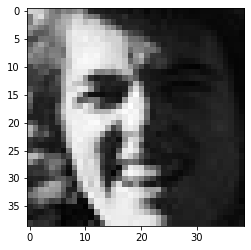

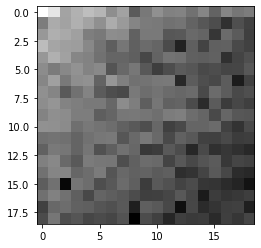

In [45]:
import numpy as np

face = df.face.iloc[0]
plt.figure()
plt.imshow(face, cmap="gray")

fft2d = np.log(np.abs(np.fft.fft2(face)))
fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]

print(fft2d)
plt.figure()

plt.imshow(fft2d, cmap="gray")
fvector = fft2d[0:60,0:60]


In [50]:
from scipy.fftpack import dct
numfeats = 30
import numpy as np
def getFeats(face):
    try:
        fft = np.log10(np.abs(np.fft.fft2(face)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(face)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None
        

Invalid face to get features


AttributeError: 'NoneType' object has no attribute 'shape'

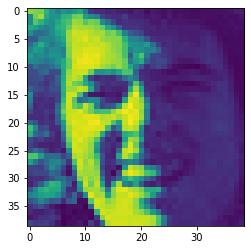

In [51]:
getFeats(face).shape

Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features


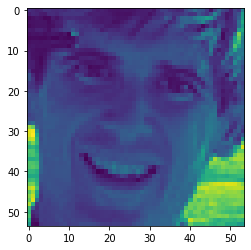

In [52]:
df["feats"] = df["face"].apply(lambda face: getFeats(face))

In [53]:
# Filter out null faces that cannot extract features
df = df[~df["feats"].isnull()]


In [54]:
df.head()

,path,GT,face,shapes,feats
1,faces-datamad0620/todas_heterogeneas/carlos/9.jpg,carlos,"[[38, 34, 41, 40, 41, 39, 39, 42, 42, 42, 43, ...","(63, 63)","[2.92109494695864, 3.6098735862821147, 2.61157..."
2,faces-datamad0620/todas_heterogeneas/carlos/10...,carlos,"[[62, 59, 63, 65, 66, 70, 73, 77, 82, 79, 84, ...","(207, 207)","[4.706740742485133, 4.823847114405931, 4.48639..."
4,faces-datamad0620/todas_heterogeneas/carlos/5.jpg,carlos,"[[30, 12, 11, 10, 11, 7, 6, 8, 7, 9, 29, 84, 9...","(98, 98)","[4.3806478681705325, 4.0345493208543575, 4.228..."
8,faces-datamad0620/todas_heterogeneas/carlos/3.jpg,carlos,"[[251, 246, 253, 252, 252, 253, 253, 253, 253,...","(268, 268)","[5.328678429447139, 4.976871096692665, 5.26636..."
9,faces-datamad0620/todas_heterogeneas/carlos/1.jpg,carlos,"[[168, 161, 175, 181, 175, 183, 181, 180, 168,...","(65, 65)","[3.972642582568396, 3.6794585734564134, 3.5032..."


In [55]:
df.GT.value_counts()

jaime      10
adri        9
germán     9
míriam     8
paula       8
nicola      7
antonio     7
jose        6
carlos      5
Name: GT, dtype: int64

In [62]:
df.iloc[0]["feats"].shape

(900,)

# Training a RandomForest model

In [56]:
X = df.feats
y = df.GT

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
y_test

63    míriam
59       adri
12     nicola
10     nicola
44       jose
4      carlos
75      paula
43       jose
65    míriam
29      jaime
26      jaime
9      carlos
69    míriam
30    germán
Name: GT, dtype: object

In [65]:
from scipy.spatial.distance import euclidean as distance

def getPrediction(vect):
    try:
        diffs = X_train.apply(lambda x: distance(x,vect))
        predictIndex = diffs.sort_values(ascending=True).index[0]
        gt = df.iloc[predictIndex].GT
        return gt
    except:
        return "Cannot recognize"

In [66]:

pd.DataFrame({
    "GT":y_test,
    "prediction": X_test.apply(lambda x: getPrediction(x))
})

,GT,prediction
63,míriam,jaime
59,adri,germán
12,nicola,jaime
10,nicola,jose
44,jose,míriam
4,carlos,míriam
75,paula,Cannot recognize
43,jose,míriam
65,míriam,jaime
29,jaime,germán


# Now with a proper knn model

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#neigh = KNeighborsClassifier(n_neighbors=5)
#neigh = SVC(kernel="poly")
neigh = RandomForestClassifier()

XX = np.vstack(X_train)
print(XX)
print(XX.shape)
neigh.fit(XX, y_train)

[[2.92109495 3.60987359 2.61157753 ... 2.21163021 2.01479116 1.35143545]
 [5.54808165 5.55818285 5.35804347 ... 3.6803118  3.73594909 3.19374821]
 [4.32059176 4.07753792 4.03166265 ... 3.06392711 2.69294558 2.5327171 ]
 ...
 [4.3612341  4.0688957  4.26722235 ... 2.75111974 2.6865645  2.93239832]
 [4.88266854 5.14084958 5.14856727 ... 2.86108558 3.47657102 3.44522045]
 [4.93797469 4.6100261  4.53674343 ... 2.5880339  2.70914208 3.13694868]]
(55, 900)


RandomForestClassifier()

In [69]:
XXT = np.vstack(X_test)
print(XXT.shape)
y_pred = neigh.predict(XXT)

(14, 900)


In [70]:
pd.DataFrame({
    "GT":y_test,
    "prediction":y_pred
})


,GT,prediction
63,míriam,jaime
59,adri,adri
12,nicola,antonio
10,nicola,antonio
44,jose,antonio
4,carlos,antonio
75,paula,antonio
43,jose,adri
65,míriam,jaime
29,jaime,jaime


In [71]:
def whoIsThisGuy(path,faceIndex=0):
    img = cv2.imread(path) 
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
    x,y,w,h = faces[faceIndex]
    lau = img_bw[y:y+h,x:x+w]
    print(neigh.predict([getFeats(lau)]))
    plt.imshow(lau, cmap="gray")

['germán']


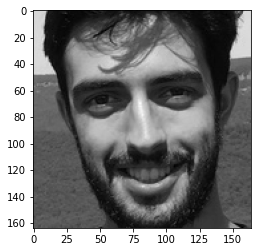

In [77]:
whoIsThisGuy("faces-datamad0620/todas_heterogeneas/germán/9.jpg",0)

['paula']


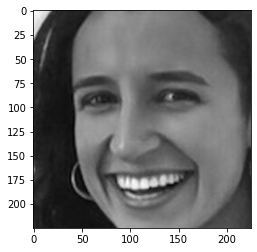

In [79]:
whoIsThisGuy("faces-datamad0620/todas_heterogeneas/paula/1.jpg",1)